# Visualizing Geographic Data

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

In this mission, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the openflights website. Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

### airlines.csv - data on each airline.

- country - where the airline is headquartered.
- active - if the airline is still active.
### airports.csv - data on each airport.

- name - name of the airport.
- city - city the airport is located.
- country - country the airport is located.
- code - unique airport code.
- latitude - latitude value.
- longitude - longitude value.

### routes.csv - data on each flight route.

- airline - airline for the route.
- source - starting city for the route.
- dest - destination city for the route.

We can explore a range of interesting questions and ideas using these datasets:

For each airport, which destination airport is the most common?
Which cities are the most important hubs for airports and airlines?
Before diving into coordinate systems, explore the datasets in the code cell below.

### Instructions

- Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and routes.
- Use the DataFrame.iloc[] method to return the first row in each dataframe as a neat table.
#### Display the first rows for all dataframes using the print() function. Try to answer the following questions:
- What's the best way to link the data from these 3 different datasets together?
- What are the formats of the latitude and longitude values?

In [2]:
import pandas as pd
import numpy as np
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

In [3]:
airlines.loc[0]

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object

In [4]:
airports.loc[0]

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object

In [5]:
routes.loc[0]

airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object

Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the basemap toolkit. Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The documentation for basemap provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on its own, but provides the facilities to transform coordinates to one of 25 different map projections.

Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. Before we dive into how basemap works, let's get familiar with how to install it.

The easiest way to install basemap is through Anaconda. If you're new to Anaconda, we recommend checking out the installation documentation:
```python
conda install basemap
```
If the above code does not work for you, you can install Basemap through the Linux command line using the following code:
```python
conda install -c conda-forge basemap
```
The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:
```python
from mpl_toolkits.basemap import Basemap
```
If an error is returned, we recommend searching for similar errors on StackOverflow to help debug the issue. Because basemap uses matplotlib, you'll want to import matplotlib.pyplot into your environment when you use Basemap.

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters:

- projection: the map projection.
- llcrnrlat: latitude of lower left hand corner of the desired map domain
- urcrnrlat: latitude of upper right hand corner of the desired map domain
- llcrnrlon: longitude of lower left hand corner of the desired map domain
- urcrnrlon: longitude of upper right hand corner of the desired map domain

### Instructions

Create a new basemap instance with the following parameters:

- projection: "merc"
- llcrnrlat: -80 degrees
- urcrnrlat: 80 degrees
- llcrnrlon: -180 degrees
- urcrnrlon: 180 degrees
Assign the instance to the new variable m.

In [7]:
m =Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use Series.tolist() to convert the longitude and latitude columns from the airports dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:
```python
x, y = m(longitudes, latitudes)
```
The basemap object will return 2 list objects, which we assign to x and y. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

### Instructions

- Convert the longitude values from spherical to Cartesian and assign the resulting list to x.
- Convert the latitude values from spherical to Cartesian and assign the resulting list to y.


In [8]:
longitudes = airports.longitude.tolist()
latitudes = airports.latitude.tolist()
x, y = m(longitudes,latitudes)

Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of x and y coordinates, we use the basemap.scatter() method.

m.scatter(x,y)
The basemap.scatter() method has similar parameters to the pyplot.scatter(). For example, we can customize the size of each marker using the s parameter:
```python
# Large markers.
m.scatter(x,y,s=10)
# Smaller markers.
m.scatter(x,y,s=5)
```
After we've created the scatter plot, use plt.show() to display the plot. We'll dive more into customizing the plot in the next step but now, create a simple scatter plot.

### Instructions

- Create a scatter plot using the converted latitude and longitude values using a marker size of 1.
- Display the scatter plot.

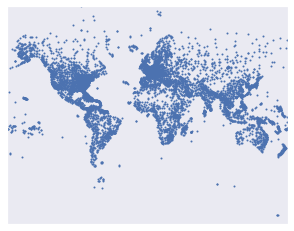

In [9]:
m.scatter(x, y, s=1)
plt.show()

You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the basemap.drawcoastlines() method.

### Instructions

- Use basemap.drawcoastlines() to enable the coast lines to be displayed.
- Display the plot using plt.show().

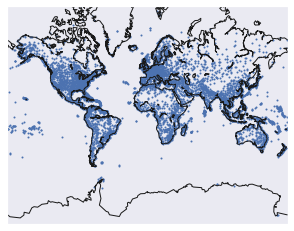

In [10]:
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

Because basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map.

*We can add code that:*

uses pyplot.subplots() to specify the figsize parameter
returns the Figure and Axes object for a single subplot and assigns to fig and ax respectively
use the Axes.set_title() method to set the map title
### Instructions

#### Before creating the basemap instance and generating the scatter plot, add code that:
- creates a figure with a height of 20 inches and a width of 15 inches
- sets the title of the scatter plot to "Scaled Up Earth With Coastlines"

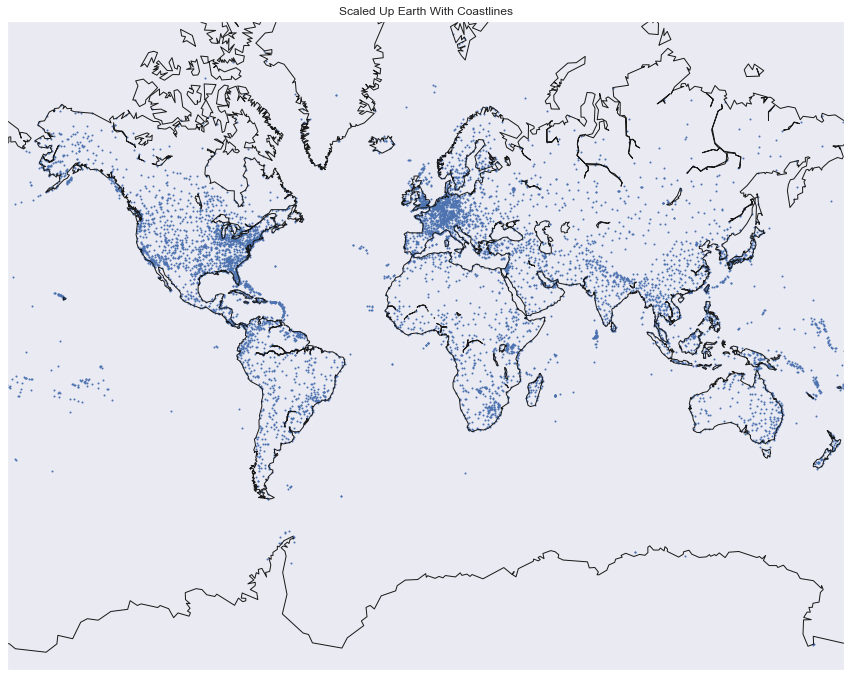

In [11]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

To make things easier, we've created a new CSV file called geo_routes.csv that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with.

### Instructions

- Read geo_routes.csv into a dataframe named geo_routes.
- Use the DataFrame.info() method to look for columns containing any null values.
- Display the first five rows in geo_routes.

In [12]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [13]:
geo_routes.head(5)

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:

- lon1 - longitude of the starting point.
- lat1 - latitude of the starting point.
- lon2 - longitude of the ending point.
- lat2 - latitude of the ending point.
The following code generates a great circle for the first three routes in the dataframe:

- m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
- m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
- m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the basemap.drawgreatcircle() method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the documentation for the method:

Note: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.

### Instructions

Write a function, named create_great_circles() that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:

- Accept a dataframe as the sole parameter
- Iterate over the rows in the dataframe using DataFrame.iterrows()
#### For each row:

- Draw a great circle using the four geographic coordinates only if:

The absolute difference between the latitude values (end_lat and start_lat) is less than 180.
If the absolute difference between the longitude values (end_lon and start_lon) is less than 180.
Create a filtered dataframe containing just the routes that start at the DFW airport.

- Select only the rows in geo_routes where the value for the source column equals "DFW".
-  Assign the resulting dataframe to dfw.
- Pass dfw into create_great_circles() and display the plot using the pyplot.show() function.

-Uncomment the first three lines of code.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


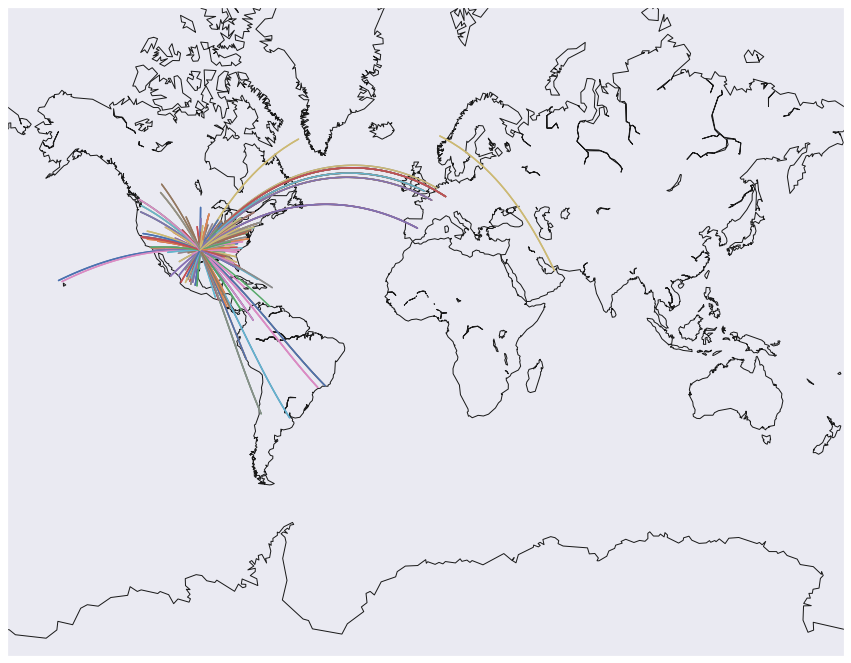

In [14]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

# Start writing your solution below this line
def create_great_circles(df):
    for index, row in df.iterrows():
        start_lat  = row['start_lat']
        end_lat = row['end_lat']
        start_lon = row['start_lon']
        end_lon = row['end_lon']
        if (end_lat - start_lat) < 180 and (end_lon - start_lon) < 180:
            m.drawgreatcircle(start_lon,start_lat, end_lon, end_lat)
dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)
plt.show()
        